In [ ]:
# Draft code for making a 1D contrast curve for my Altair data, for R>lambda/D

# Created 2019 Nov. 25 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file = "data/test_csv_file_all_iterations_afternoon_of_20191124_number01.csv"

In [26]:
# read in csv of detection info
info_file = pd.read_csv(csv_file)

In [29]:
# 1. Consider only the rows corresponding to the most recent injection iteration 
#     for each combination of (radius, azimuth, starting amplitude).
# 2. For each radius, find median value of amplitude across all azimuth and 
#     starting amplitude.

# find unique combinations of (radius, azimuth, starting amplitude)
#info_file_grouped_rad_ampl_ampl0 = info_file.groupby(["rad_asec", "ampl_linear_norm", "ampl_linear_norm_0"], 
#                                            axis=0, 
#                                            as_index=False).median()
info_file_grouped_rad_ampl_ampl0 = info_file.drop_duplicates(subset=["rad_asec", 
                                                                     "angle_deg", 
                                                                     "ampl_linear_norm_0"])

In [31]:
info_file_grouped_rad_ampl_ampl0

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
0,0,0.0001,0.0001,0.0,1.165688e+09,0,NaN,NaN,155041.449715,0.25,NaN,2.564347,3.975800e+05
1,1,0.0001,0.0001,0.0,1.165688e+09,0,NaN,NaN,659551.801559,0.20,NaN,1.542490,1.017352e+06
2,2,0.0010,0.0010,0.0,1.165688e+09,0,NaN,NaN,195529.685267,0.25,NaN,5.946569,1.162731e+06
3,3,0.0010,0.0010,0.0,1.165688e+09,0,NaN,NaN,673178.849548,0.20,NaN,2.527626,1.701544e+06
4,4,0.0010,0.0010,0.0,1.165688e+09,0,NaN,NaN,72503.949666,0.35,NaN,7.065620,5.122853e+05
5,5,0.0001,0.0001,0.0,1.165688e+09,0,NaN,NaN,10753.792116,0.35,NaN,5.936435,6.383919e+04
6,6,0.0010,0.0010,0.0,1.165688e+09,0,NaN,NaN,70062.539411,0.30,NaN,9.524368,6.673014e+05
7,7,0.0001,0.0001,0.0,1.165688e+09,0,NaN,NaN,22944.203256,0.30,NaN,5.782577,1.326766e+05


In [32]:
# initialize a dataframe for containing the most recent injections

df_recent = pd.DataFrame(columns=list(info_file_grouped_rad_ampl_ampl0.keys()))

In [38]:
for combo_num in range(0,len(info_file_grouped_rad_ampl_ampl0)):
    # loop over each combination of (radius, azimuth, starting amplitude)

    info_file_unique_combo = info_file.where(np.logical_and(np.logical_and(info_file["rad_asec"] == 
                          info_file_grouped_rad_ampl_ampl0["rad_asec"].iloc[combo_num],
                   info_file["angle_deg"] == 
                          info_file_grouped_rad_ampl_ampl0["angle_deg"].iloc[combo_num]),
                   info_file["ampl_linear_norm_0"] == 
                       info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].iloc[combo_num])).dropna(how="all")
    
    for starting_ampl_num in range(0,len(info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique())):
        # loop over all starting amplitudes
        
        this_ampl = info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique()[starting_ampl_num]
        
        info_file_unique_combo_ampl0 = info_file_unique_combo.where(info_file_unique_combo["ampl_linear_norm_0"] == 
                                                                    this_ampl)
            
        # take the row corresponding to the last injection iteration, for THIS starting amplitude
        info_file_unique_combo_ampl0_recent = info_file_unique_combo_ampl0.where(info_file_unique_combo_ampl0["inject_iteration"] == 
                                                                                 np.nanmax(info_file_unique_combo_ampl0["inject_iteration"])).dropna(how="all")
        
        # paste this row into the 'new' dataframe 
        df_recent = df_recent.append(info_file_unique_combo_ampl0_recent, sort=True)

    Unnamed: 0  ampl_linear_norm  ampl_linear_norm_0  angle_deg     host_ampl  \
58        58.0            0.0007              0.0001        0.0  1.165688e+09   

    inject_iteration  last_ampl_step_signed  last_ampl_step_unsigned  \
58               9.0                0.00005                  0.00005   

            noise  rad_asec    rad_pix       s2n         signal  
58  177123.187097      0.25  23.364486  5.140733  910543.026117  
---------------
Empty DataFrame
Columns: [Unnamed: 0, ampl_linear_norm, ampl_linear_norm_0, angle_deg, host_ampl, inject_iteration, last_ampl_step_signed, last_ampl_step_unsigned, noise, rad_asec, rad_pix, s2n, signal]
Index: []
---------------
    Unnamed: 0  ampl_linear_norm  ampl_linear_norm_0  angle_deg     host_ampl  \
69        69.0            0.0043              0.0001        0.0  1.165688e+09   

    inject_iteration  last_ampl_step_signed  last_ampl_step_unsigned  \
69              15.0                0.00005                  0.00005   

       

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN axis encountered


In [39]:
df_recent

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
58,58.0,0.00070,0.0001,0.0,1.165688e+09,9.0,0.00005,0.00005,177123.187097,0.25,23.364486,5.140733,9.105430e+05
69,69.0,0.00430,0.0001,0.0,1.165688e+09,15.0,0.00005,0.00005,837215.971643,0.20,18.691589,5.007717,4.192541e+06
34,34.0,0.00065,0.0010,0.0,1.165688e+09,4.0,-0.00005,0.00005,174384.047200,0.25,23.364486,4.978740,8.682128e+05
66,66.0,0.00430,0.0010,0.0,1.165688e+09,12.0,0.00005,0.00005,837215.971643,0.20,18.691589,5.007717,4.192541e+06
36,36.0,0.00005,0.0010,0.0,1.165688e+09,4.0,-0.00005,0.00005,9130.492346,0.35,32.710280,4.181444,3.817864e+04
53,53.0,0.00005,0.0001,0.0,1.165688e+09,7.0,-0.00005,0.00005,9130.492346,0.35,32.710280,4.181444,3.817864e+04
38,38.0,0.00005,0.0010,0.0,1.165688e+09,4.0,-0.00005,0.00005,22705.393246,0.30,28.037383,4.466325,1.014097e+05
54,54.0,0.00005,0.0001,0.0,1.165688e+09,7.0,-0.00005,0.00005,22705.393246,0.30,28.037383,4.466325,1.014097e+05
58,58.0,0.00070,0.0001,0.0,1.165688e+09,9.0,0.00005,0.00005,177123.187097,0.25,23.364486,5.140733,9.105430e+05
69,69.0,0.00430,0.0001,0.0,1.165688e+09,15.0,0.00005,0.00005,837215.971643,0.20,18.691589,5.007717,4.192541e+06


In [40]:
# among the rows in the 'new' dataframe, take the median at each radius

contrast_curve = df_recent.groupby(["rad_asec"], axis=0, as_index=False).median()

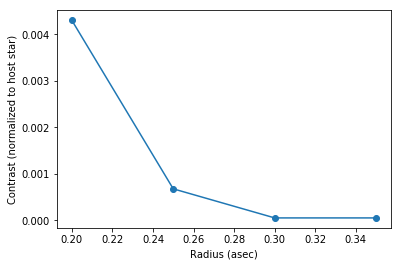

In [43]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.show()

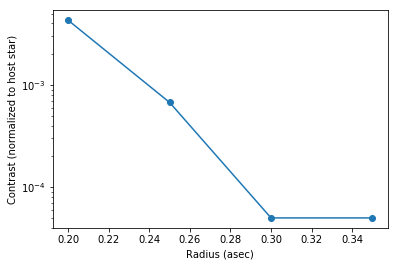

In [45]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.yscale('log')
#plt.savefig("first_contrast_curve.pdf")
plt.show()

In [44]:
contrast_curve["ampl_linear_norm"].values

array([4.30e-03, 6.75e-04, 5.00e-05, 5.00e-05])

In [ ]:
# write out to csv
file_name_cc = config["data_dirs"]["DIR_S2N"] + config["file_names"]["CONTCURV_CSV"]
contrast_curve_pd.to_csv(file_name_cc, sep = ",", columns = ["rad_asec","ampl_linear_norm"])
print("Wrote out contrast curve CSV to " + file_name_cc)

# make plot
print(contrast_curve_pd)
file_name_cc_plot = config["data_dirs"]["DIR_FYI_INFO"] + config["file_names"]["CONTCURV_PLOT"]
plt.plot(contrast_curve_pd["rad_asec"],contrast_curve_pd["ampl_linear_norm"])
plt.xlabel("Radius from host star (asec)")
plt.ylabel("Min. companion amplitude with S/N > threshhold")
plt.savefig(file_name_cc_plot)
plt.clf()
print("Wrote out contast curve plot to " + file_name_cc_plot)